# Visualisation of Customer Segmentation Result

# 1. Import Relevant Libraries and Datasets

## 1.1 Import Relevant Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Import Relevant Datasets

In [8]:
original_df = pd.read_csv("../../data/processed/banking_behaviour_preference.csv")
segmentation_result_df = pd.read_csv("../../data/processed/segmentation_result_static.csv")

# join the table of customer information and the table of customer segmentation
final_df = pd.merge(original_df, segmentation_result_df, on='CLIENTNUM')

### 1.2.1 Segment Mapping

Restore the original descriptive coding of the segments for clearer visualisation.

In [11]:
segment_mapping = {
    1: "Low Financial status, Low Loyalty",
    2: "Moderate or Low Financial status, Moderate or Low Loyalty",
    3: "Low or Moderate Financial status, High Loyalty",
    4: "High Financial status, Low or Moderate Loyalty",
    5: "High Financial status, High Loyalty"
}

final_df.loc[:, 'Segment'] = final_df['Segment'].map(segment_mapping)

# 2. Visualisation

## 2.1 Visualisation for Product Usage

### 2.1.1 Bar Plot for Product Usage across All Segments

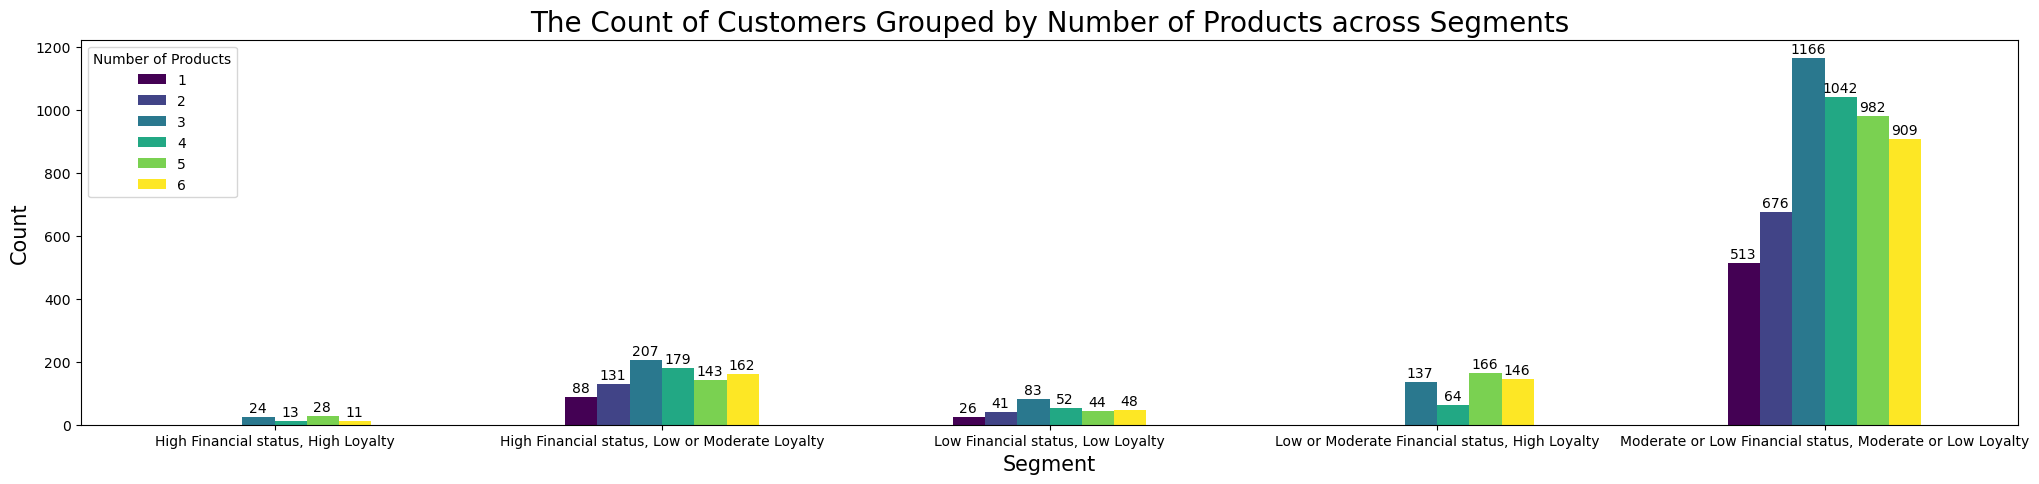

In [16]:
product_usage_df = final_df.groupby('Segment')['No_of_product'].value_counts().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(25, 5))

product_usage_df.plot(kind='bar', ax=ax, colormap='viridis')

for i in range(product_usage_df.shape[0]):
    for j in range(product_usage_df.shape[1]):
        count = product_usage_df.iat[i, j]
        if count != 0:
            ax.text(i+(j/product_usage_df.shape[1]-0.5)*0.5+0.04, count+5, count,
                    ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Segment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.legend(title = 'Number of Products')
plt.title('The Count of Customers Grouped by Number of Products across Segments', fontsize=20)
plt.xticks(rotation=0)
plt.show()

### 2.1.2 Bar Plot for Product Usage across Non-Default Segments

The default segment, **Moderate or Low Financial status, Moderate or Low Loyalty**, contains much more customers than the other 4 categories. Hence, we make an additional plot for **the non-default segments only** for a clearer visualisation.

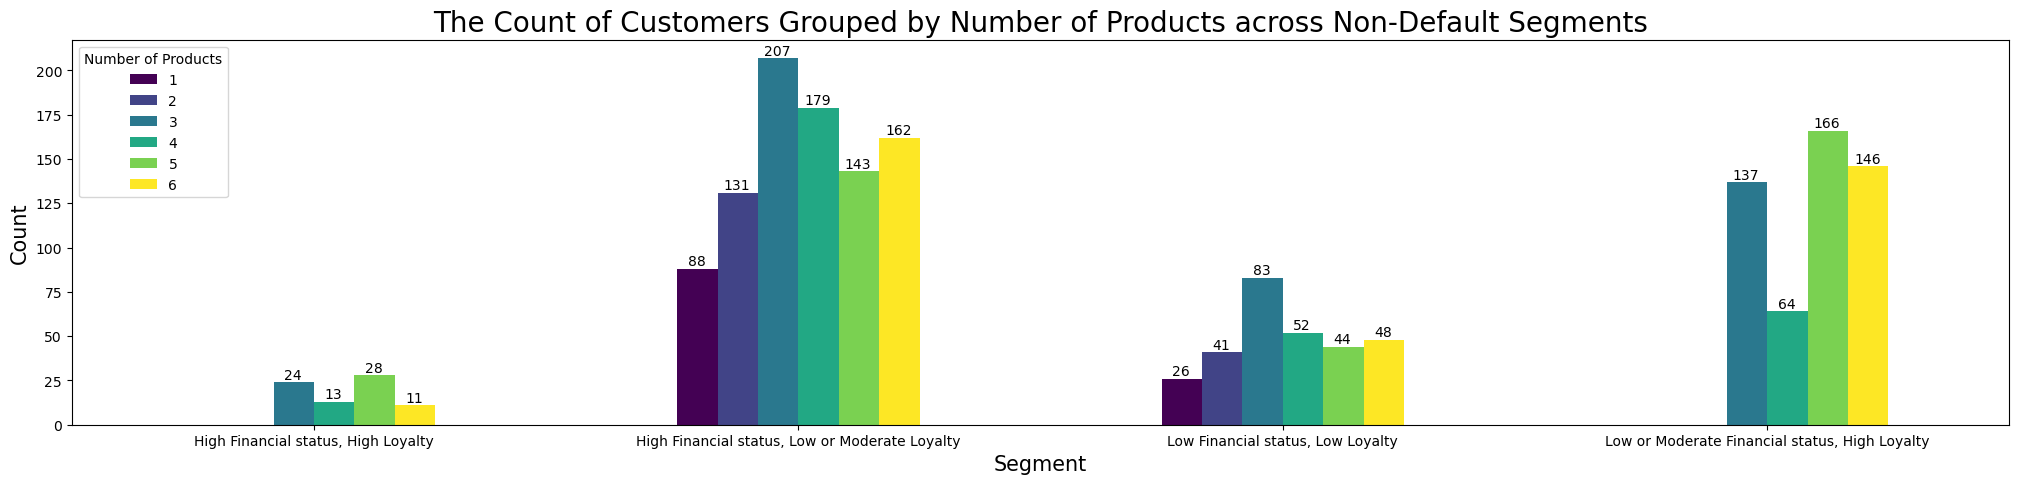

In [19]:
product_usage_df_nondefault = product_usage_df[product_usage_df.index != 'Moderate or Low Financial status, Moderate or Low Loyalty']

fig, ax = plt.subplots(figsize=(25, 5))

product_usage_df_nondefault.plot(kind='bar', ax=ax, colormap='viridis')

for i in range(product_usage_df_nondefault.shape[0]):
    for j in range(product_usage_df_nondefault.shape[1]):
        count = product_usage_df_nondefault.iat[i, j]
        if count != 0:
            ax.text(i+(j/product_usage_df_nondefault.shape[1]-0.5)*0.5+0.04, count, count,
                    ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Segment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.legend(title = 'Number of Products')
plt.title('The Count of Customers Grouped by Number of Products across Non-Default Segments', fontsize=20)
plt.xticks(rotation=0)
plt.show()

## 2.2 Visualisation for Transaction History

### 2.2.1 Visualisation for Transaction Amount across Segments

/var/folders/dm/l1cyfcn971v7k_ywbytkx63w0000gn/T/ipykernel_17341/318992419.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([segment.replace(', ', ',\n') for segment in trans_amount_df.index.tolist()], rotation=0)


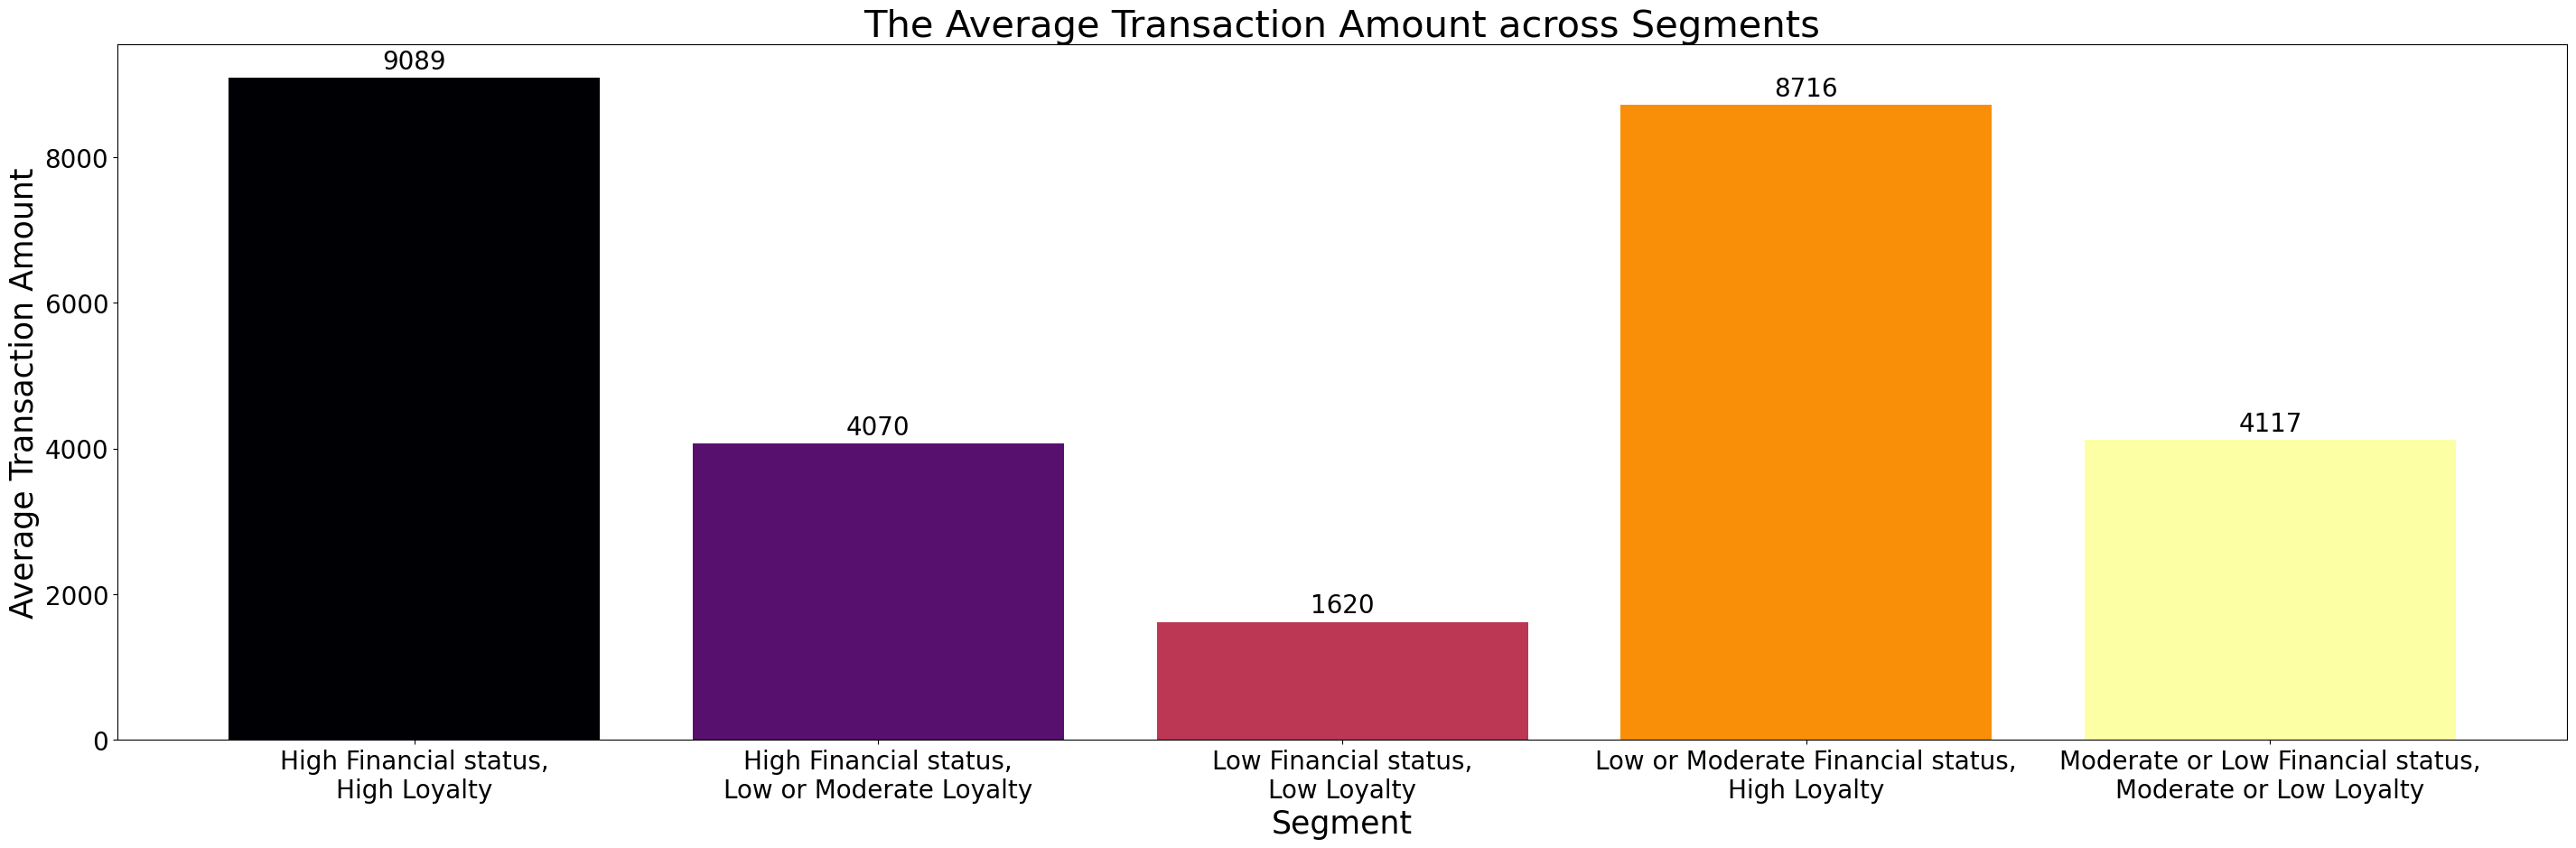

In [23]:
trans_amount_df = final_df.groupby('Segment')['Total_Trans_Amt'].mean()

fig, ax = plt.subplots(figsize=(35, 10))
colours = plt.cm.inferno(np.linspace(0, 1, len(trans_amount_df)))
bars = ax.bar(trans_amount_df.index, trans_amount_df.values, color=colours)
#trans_amount_df.plot(kind='bar', ax=ax, color=colours)
for bar in bars:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+50, int(bar.get_height()),
            ha='center', va='bottom', fontsize=20)
ax.set_xticklabels([segment.replace(', ', ',\n') for segment in trans_amount_df.index.tolist()], rotation=0)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('Segment', fontsize=25)
ax.set_ylabel('Average Transaction Amount', fontsize=25)
plt.title('The Average Transaction Amount across Segments', fontsize=30)
plt.show()

### 2.2.2 Visualisation for Transaction Count across Segments

/var/folders/dm/l1cyfcn971v7k_ywbytkx63w0000gn/T/ipykernel_17341/1569362996.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([segment.replace(', ', ',\n') for segment in trans_count_df.index.tolist()], rotation=0)


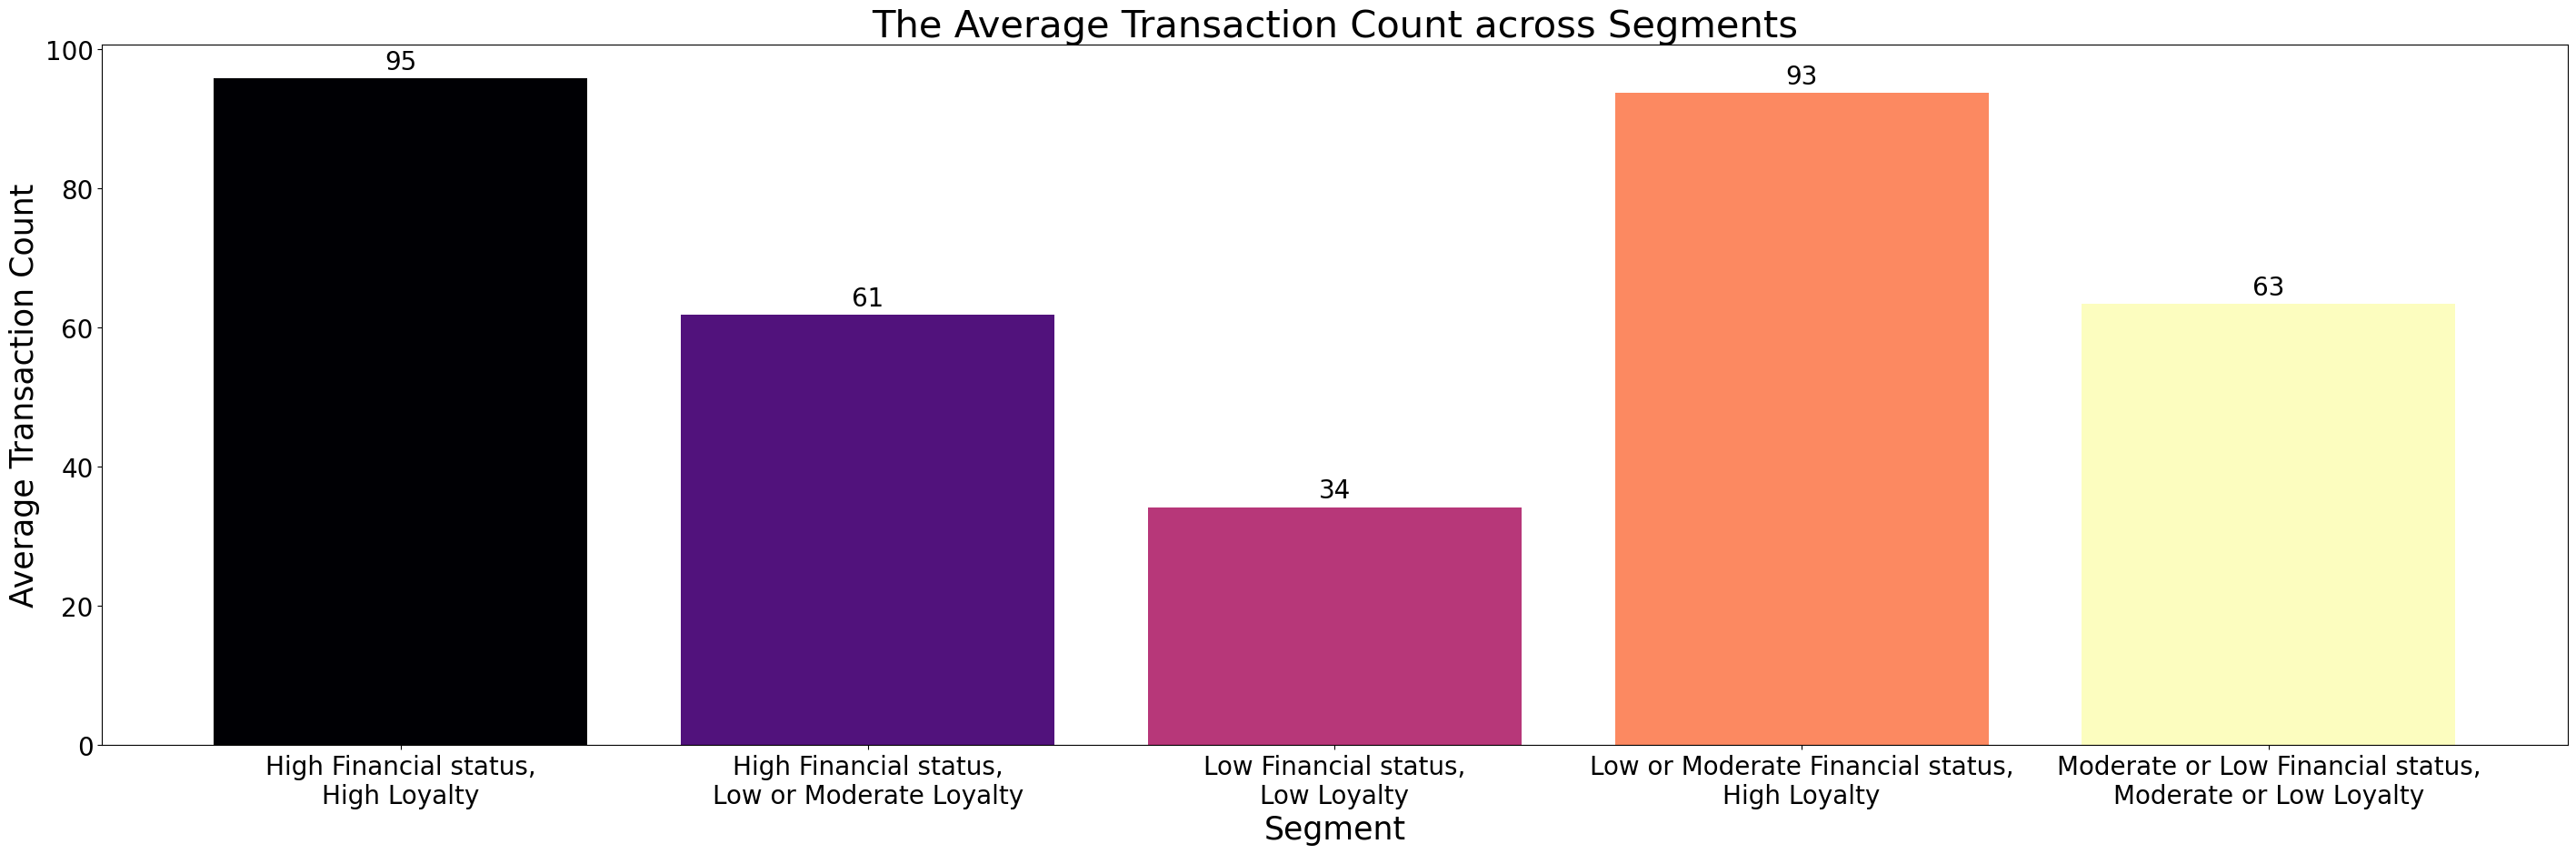

In [26]:
trans_count_df = final_df.groupby('Segment')['Total_Trans_Count'].mean()

fig, ax = plt.subplots(figsize=(35, 10))
colours = plt.cm.magma(np.linspace(0, 1, len(trans_count_df)))
bars = ax.bar(trans_count_df.index, trans_count_df.values, color=colours)
#trans_count_df.plot(kind='bar', ax=ax, color=colours)
for bar in bars:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, int(bar.get_height()),
            ha='center', va='bottom', fontsize=20)
ax.set_xticklabels([segment.replace(', ', ',\n') for segment in trans_count_df.index.tolist()], rotation=0)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('Segment', fontsize=25)
ax.set_ylabel('Average Transaction Count', fontsize=25)
plt.title('The Average Transaction Count across Segments', fontsize=30)
plt.show()

## 2.3 Visualisation for Digital Engagement

### 2.3.1 Data Preprocessing

Use decriptive coding for the digital features for a clearer visualations. 

In [30]:
digital_df = final_df[['Digital_Capability', 'PhoneService', 'InternetService', 
                       'TechSupport', 'PaperlessBilling', 'PaymentMethod']]

digital_df.loc[:, 'PhoneService'] = \
    digital_df['PhoneService'].replace({0: 'No', 
                                        1: 'Yes'})
digital_df.loc[:, 'InternetService'] = \
    digital_df['InternetService'].replace({0: 'DSL', 
                                           1: 'Fiber Optic',
                                           2: 'No Internet Service'})
digital_df.loc[:, 'TechSupport'] = \
    digital_df['TechSupport'].replace({0: 'No', 
                                       1: 'No Internet Service',
                                       2: 'Yes'})
digital_df.loc[:, 'PaperlessBilling'] = \
    digital_df['PaperlessBilling'].replace({0: 'No', 
                                            1: 'Yes'})
digital_df.loc[:, 'PaymentMethod'] = \
    digital_df['PaymentMethod'].replace({0: 'Bank transfer (automatic)', 
                                         1: 'Credit card (automatic)',
                                         2: 'Electronic check',
                                         3: 'Mailed check'})

digital_features = ['PhoneService', 'InternetService', 'TechSupport', 'PaperlessBilling', 'PaymentMethod']

### 2.3.2 Stacked Bar Plot for the Number of Customers with Each Digital Feature

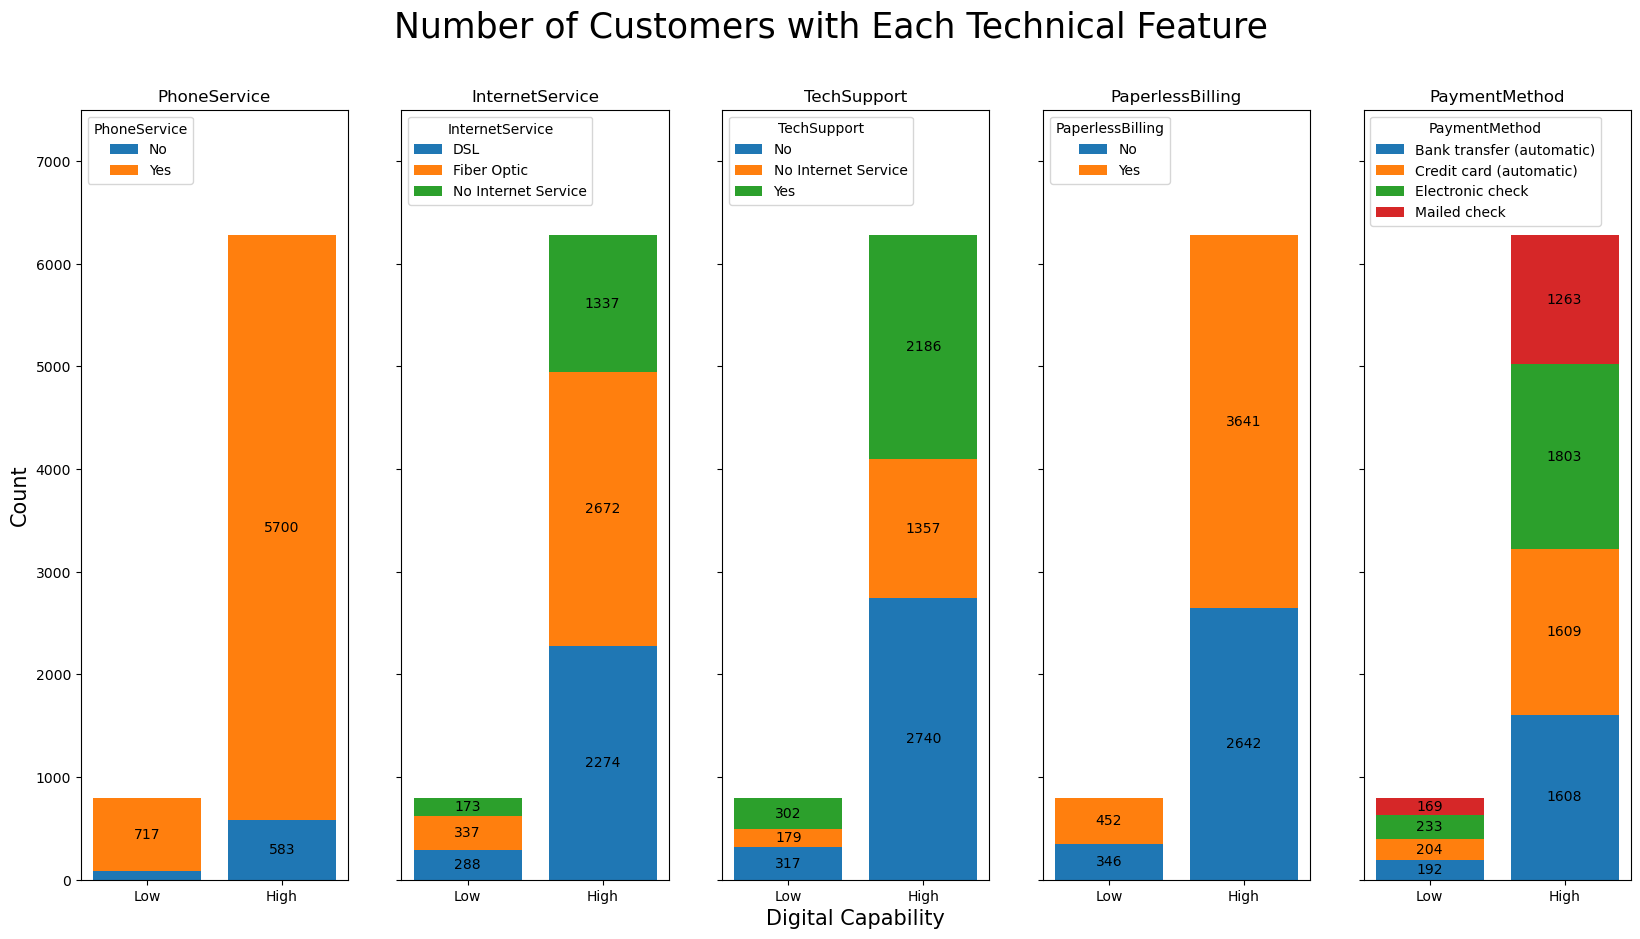

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10), sharey=True)

for i, feature in enumerate(digital_features):
    counts = digital_df.groupby('Digital_Capability')[feature].value_counts().unstack(fill_value=0)

    curr_height = np.zeros(len(counts))

    for category in counts.columns:
        axes[i].bar(counts.index, counts[category], bottom=curr_height, label=category)
        curr_height += counts[category]

        for j, count in enumerate(counts[category]):
            if count > 100:
                axes[i].text(j, curr_height[j]-count/2, count,
                            ha='center', va='center', fontsize=10)
    
    axes[i].set_ylim(0, 7500)
    axes[i].set_title(feature)
    axes[i].set_xticks(counts.index)
    axes[i].set_xticklabels(['Low', 'High'])
    axes[i].legend(title=feature, bbox_to_anchor=(0,1), loc='upper left')

axes[0].set_ylabel('Count', fontsize=15)
axes[2].set_xlabel('Digital Capability', fontsize=15)
plt.suptitle('Number of Customers with Each Technical Feature', fontsize=25)
plt.show()

### 2.3.3 Normalised Bar Plot for the Number of Customers with Each Digital Feature

We normalise the previous plot to have a clearer sense about the proportion of customers with each digital featue.

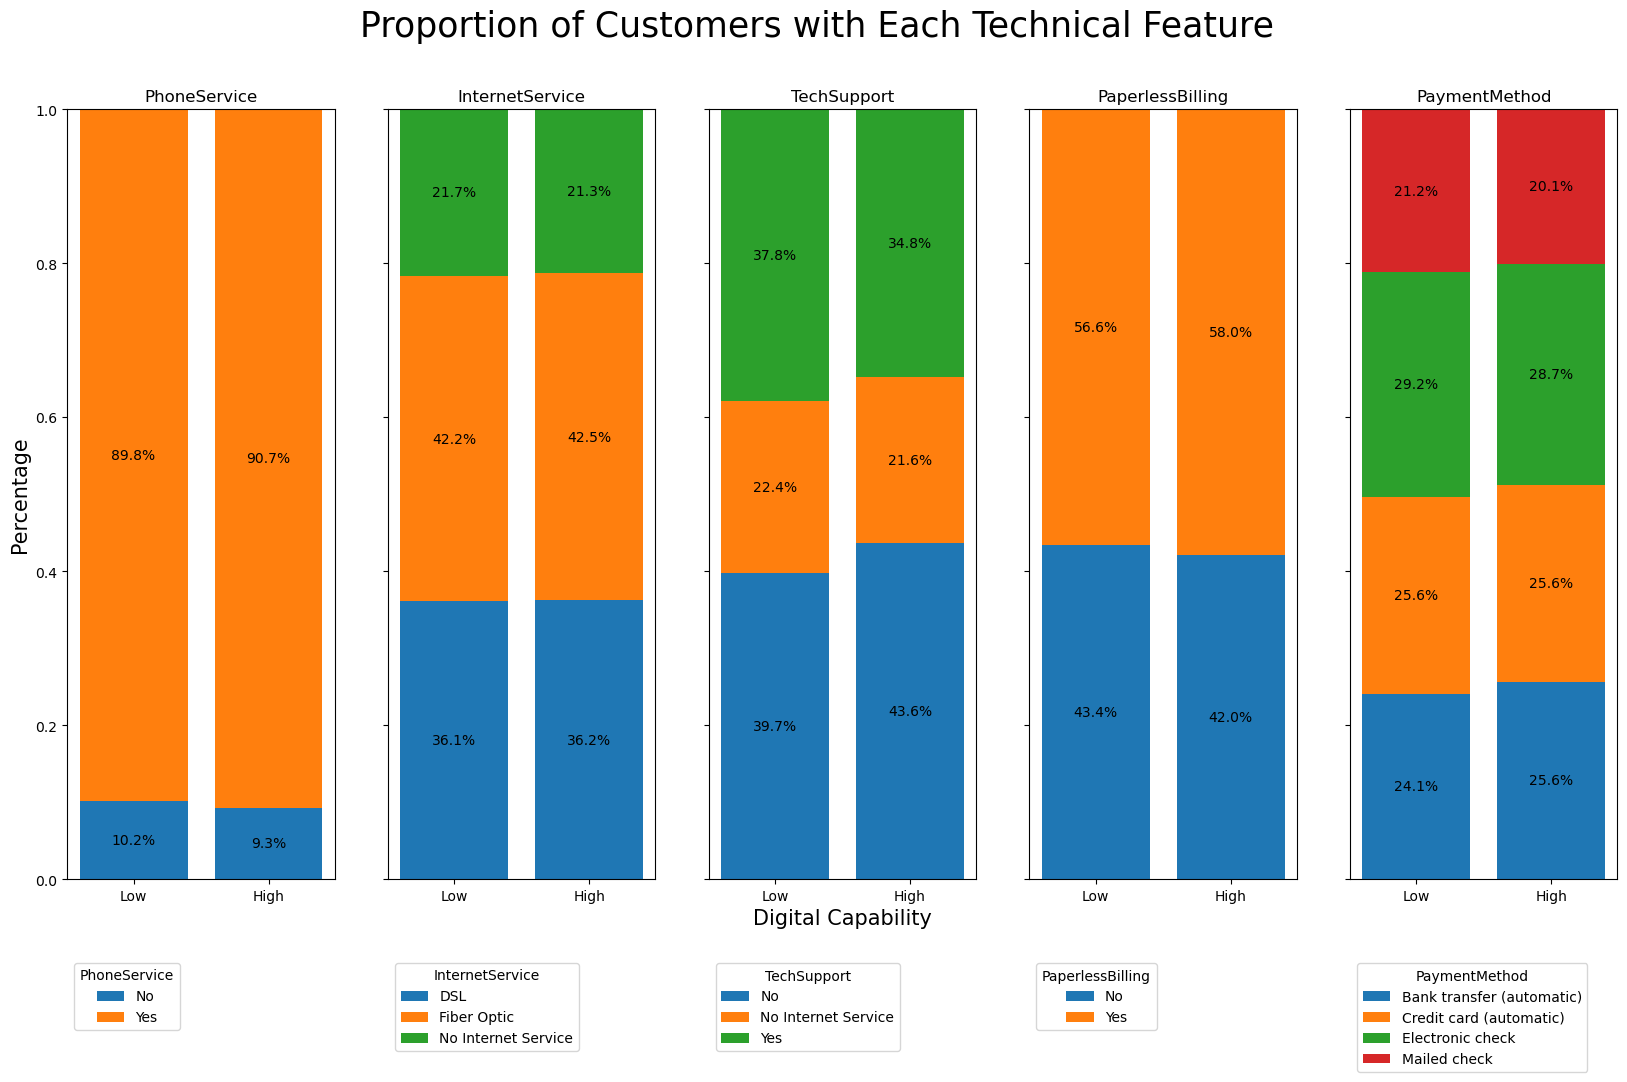

In [36]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10), sharey=True)

for i, feature in enumerate(digital_features):
    proportions = digital_df.groupby('Digital_Capability')[feature].value_counts(normalize=True).unstack(fill_value=0)

    curr_height = np.zeros(len(proportions))

    for category in proportions.columns:
        axes[i].bar(proportions.index, proportions[category], bottom=curr_height, label=category)
        curr_height += proportions[category]

        for j, proportion in enumerate(proportions[category]):
            if proportion > 0.05:
                axes[i].text(j, curr_height[j]-proportion/2, f'{round(proportion*100, 1)}%', ha='center', va='center', fontsize=10)
    
    axes[i].set_ylim(0, 1)
    axes[i].set_title(feature)
    axes[i].set_xticks(proportions.index)
    axes[i].set_xticklabels(['Low', 'High'])
    axes[i].legend(title=feature, bbox_to_anchor=(0,-0.10), loc='upper left')

axes[0].set_ylabel('Percentage', fontsize=15)
axes[2].set_xlabel('Digital Capability', fontsize=15)
plt.suptitle('Proportion of Customers with Each Technical Feature', fontsize=25)
plt.show()